In [28]:
!pip install prophet

In [29]:
import pandas as pd
import requests
import json
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

In [81]:
running_shorts_df = pd.read_csv("resources/running_shorts.csv", skiprows=1, header=None, names=['Month', 'lululemon Sales'])
tennis_skirt_df = pd.read_csv('resources/tennis_skirt.csv')
lulu_lemon_df = pd.read_csv('resources/lululemon.csv', skiprows=1, header=None, names=['Month', 'lululemon Sales'])

In [82]:
# def make_predict(df):
#     #df.drop(0, inplace=True)
#     df.columns = [['ds', 'y']]
#     df['cap'] = 100
#     df['floor'] = 0
#     model = Prophet(growth='logistic')
#     model.fit(df)

#     future = model.make_future_dataframe(periods=100, freq='M')
#     future['cap'] = 100
#     future['floor'] = 0

#     forecast = model.predict(future)

#     display(forecast.head(10))
    
# make_predict(lulu_lemon_df)

    

1

In [83]:
running_shorts_df


#lulu_lemon_df.reset_index(drop = True, inplace=True)


,Month,lululemon Sales
0,Month,running shorts: (United States)
1,2014-01,19
2,2014-02,22
3,2014-03,29
4,2014-04,31
...,...,...
116,2023-08,56
117,2023-09,42
118,2023-10,33
119,2023-11,34


In [84]:
running_shorts_df.drop(0, inplace=True)
running_shorts_df

,Month,lululemon Sales
1,2014-01,19
2,2014-02,22
3,2014-03,29
4,2014-04,31
5,2014-05,38
...,...,...
116,2023-08,56
117,2023-09,42
118,2023-10,33
119,2023-11,34


In [85]:
running_shorts_df.columns

Index(['Month', 'lululemon Sales'], dtype='object')

In [86]:
running_shorts_df = running_shorts_df.rename(columns={'Month':'ds', 'lululemon Sales':'y'})

In [87]:
running_shorts_df.tail(5)

,ds,y
116,2023-08,56
117,2023-09,42
118,2023-10,33
119,2023-11,34
120,2023-12,29


22:00:41 - cmdstanpy - INFO - Chain [1] start processing
22:00:41 - cmdstanpy - INFO - Chain [1] done processing


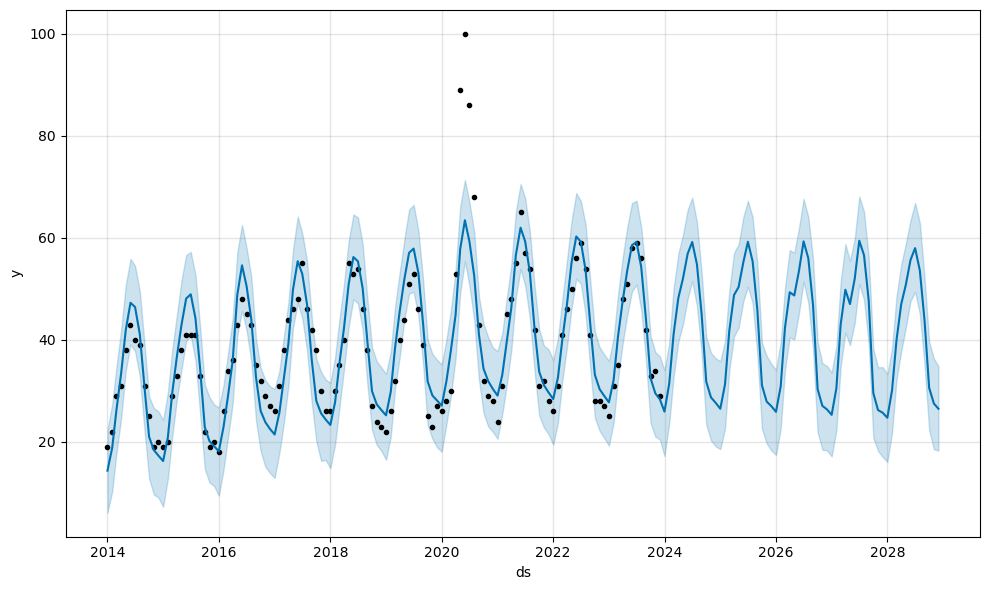

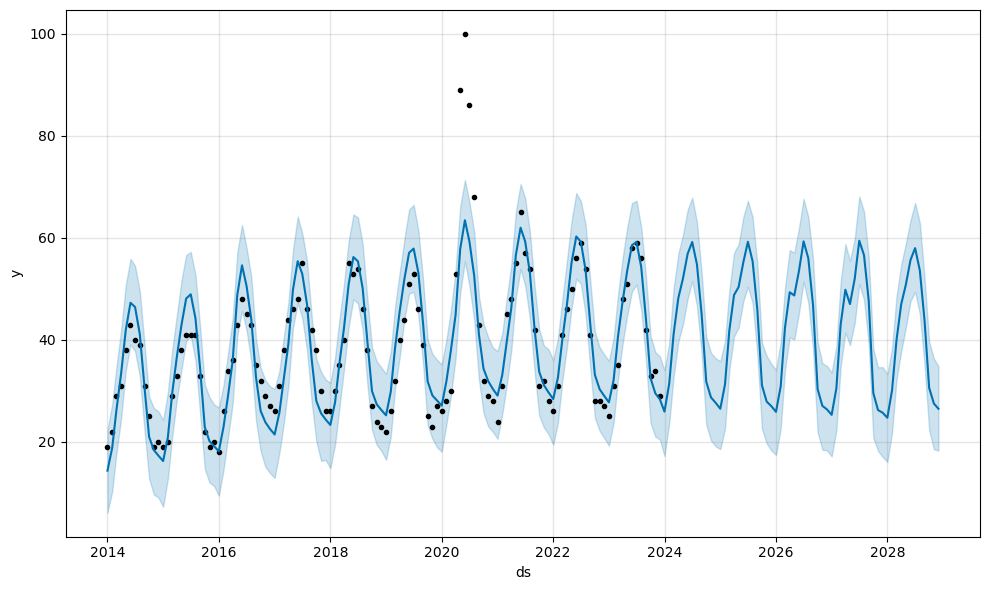

In [88]:
# non logi
m = Prophet()

m.fit(running_shorts_df)

future = m.make_future_dataframe(periods=60, freq='M')

forecast = m.predict(future)

m.plot(forecast)

In [78]:
running_shorts_df['cap'] = 100
running_shorts_df['floor'] = 0

model = Prophet(growth='logistic')
model.fit(running_shorts_df)

future = model.make_future_dataframe(periods=100, freq='M')
future['cap'] = 100
future['floor'] = 0

forecast = model.predict(future)

display(forecast.tail(50))


21:57:06 - cmdstanpy - INFO - Chain [1] start processing
21:57:06 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
170,2028-02-29,48.816390,100,0,38.854369,57.266829,48.552566,49.089944,-0.681599,-0.681599,-0.681599,-0.681599,-0.681599,-0.681599,0.0,0.0,0.0,48.134791
171,2028-03-31,48.919832,100,0,46.266431,63.836120,48.649945,49.202273,5.947815,5.947815,5.947815,5.947815,5.947815,5.947815,0.0,0.0,0.0,54.867648
172,2028-04-30,49.019946,100,0,51.331203,68.959158,48.738546,49.313519,10.673171,10.673171,10.673171,10.673171,10.673171,10.673171,0.0,0.0,0.0,59.693117
173,2028-05-31,49.123406,100,0,55.110460,73.655196,48.834963,49.427045,15.338300,15.338300,15.338300,15.338300,15.338300,15.338300,0.0,0.0,0.0,64.461706
174,2028-06-30,49.223535,100,0,58.426606,75.886061,48.925699,49.531502,17.529885,17.529885,17.529885,17.529885,17.529885,17.529885,0.0,0.0,0.0,66.753420
175,2028-07-31,49.327008,100,0,53.016144,71.337155,49.020918,49.642367,12.772488,12.772488,12.772488,12.772488,12.772488,12.772488,0.0,0.0,0.0,62.099497
176,2028-08-31,49.430487,100,0,42.889918,60.787092,49.113116,49.755119,2.719579,2.719579,2.719579,2.719579,2.719579,2.719579,0.0,0.0,0.0,52.150066
177,2028-09-30,49.530633,100,0,30.685426,48.992978,49.206261,49.865572,-9.412945,-9.412945,-9.412945,-9.412945,-9.412945,-9.412945,0.0,0.0,0.0,40.117688
178,2028-10-31,49.634121,100,0,28.577030,46.265854,49.300018,49.975661,-12.704815,-12.704815,-12.704815,-12.704815,-12.704815,-12.704815,0.0,0.0,0.0,36.929306
179,2028-11-30,49.734273,100,0,27.674142,45.382489,49.389988,50.089864,-13.591583,-13.591583,-13.591583,-13.591583,-13.591583,-13.591583,0.0,0.0,0.0,36.142690


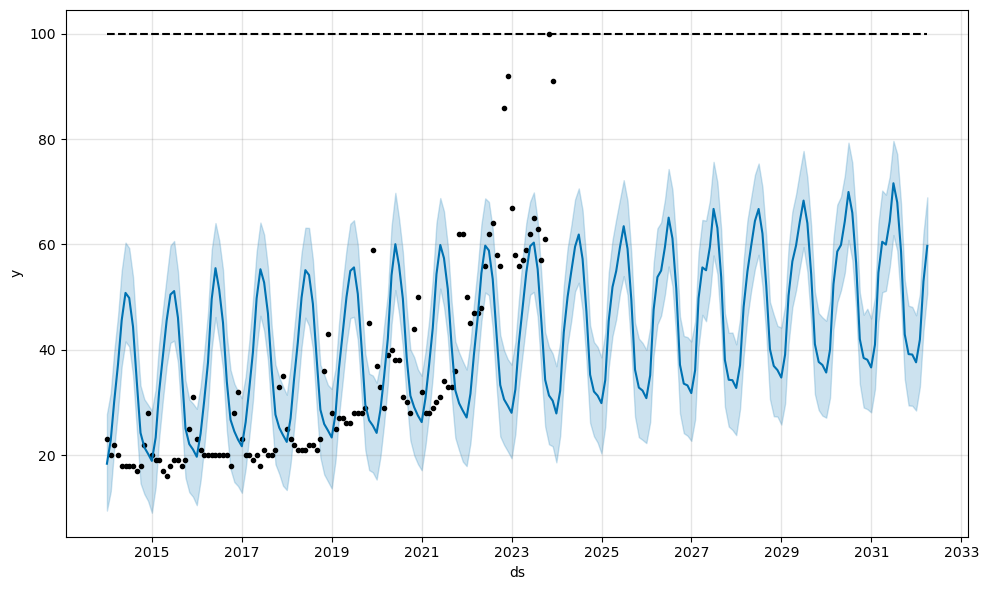

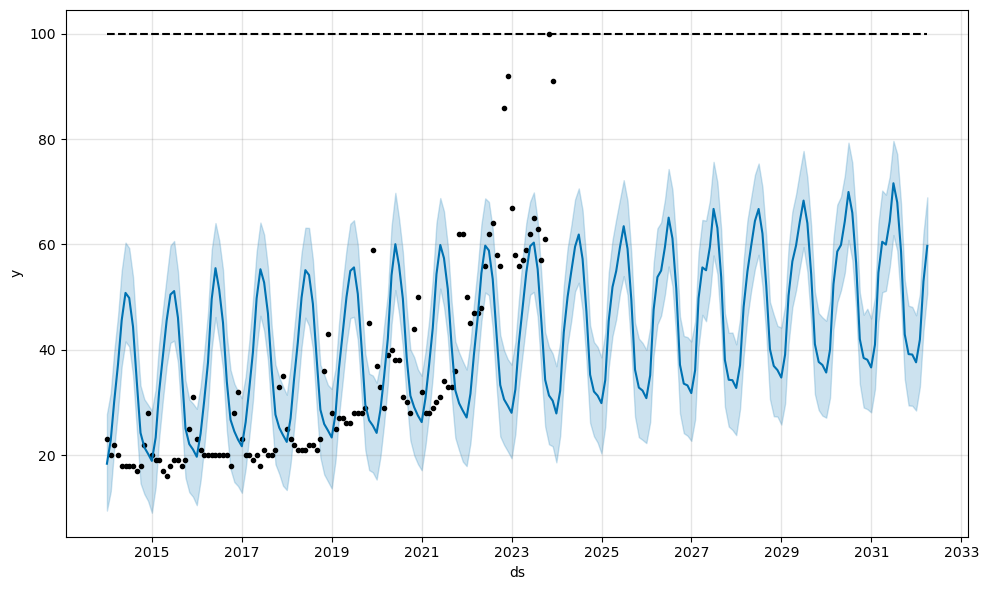

In [73]:
m.plot(forecast)

In [31]:
# Call the Prophet function and store as an object
m = Prophet()
m


In [32]:
m.fit(lulu_lemon_df)

21:27:58 - cmdstanpy - INFO - Chain [1] start processing
21:27:58 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
# Create a future DataFrame to hold predictions
# Make the prediction go out as far as 720 hours (30 days)
future = m.make_future_dataframe(periods=60, freq='M')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))

,ds
0,2014-01-01
1,2014-02-01
2,2014-03-01
3,2014-04-01
4,2014-05-01
5,2014-06-01
6,2014-07-01
7,2014-08-01
8,2014-09-01
9,2014-10-01


In [44]:
forecast = m.predict(future)
display(forecast.head(10))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,19.014000,14.735441,26.249045,19.014000,19.014000,1.438745,1.438745,1.438745,1.438745,1.438745,1.438745,0.0,0.0,0.0,20.452745
1,2014-02-01,19.105705,9.898960,21.904526,19.105705,19.105705,-2.894169,-2.894169,-2.894169,-2.894169,-2.894169,-2.894169,0.0,0.0,0.0,16.211536
2,2014-03-01,19.188535,10.012700,21.716630,19.188535,19.188535,-3.302824,-3.302824,-3.302824,-3.302824,-3.302824,-3.302824,0.0,0.0,0.0,15.885711
3,2014-04-01,19.280239,10.161499,21.872236,19.280239,19.280239,-3.318362,-3.318362,-3.318362,-3.318362,-3.318362,-3.318362,0.0,0.0,0.0,15.961878
4,2014-05-01,19.368986,9.975620,21.624735,19.368986,19.368986,-3.540157,-3.540157,-3.540157,-3.540157,-3.540157,-3.540157,0.0,0.0,0.0,15.828829
5,2014-06-01,19.460691,11.068251,22.679359,19.460691,19.460691,-2.756614,-2.756614,-2.756614,-2.756614,-2.756614,-2.756614,0.0,0.0,0.0,16.704076
6,2014-07-01,19.549437,12.063683,23.918172,19.549437,19.549437,-1.291175,-1.291175,-1.291175,-1.291175,-1.291175,-1.291175,0.0,0.0,0.0,18.258263
7,2014-08-01,19.641142,10.804602,22.725217,19.641142,19.641142,-2.610321,-2.610321,-2.610321,-2.610321,-2.610321,-2.610321,0.0,0.0,0.0,17.030821
8,2014-09-01,19.732846,8.469387,20.477769,19.732846,19.732846,-5.114807,-5.114807,-5.114807,-5.114807,-5.114807,-5.114807,0.0,0.0,0.0,14.618040
9,2014-10-01,19.821593,8.880083,20.999164,19.821593,19.821593,-4.871310,-4.871310,-4.871310,-4.871310,-4.871310,-4.871310,0.0,0.0,0.0,14.950283


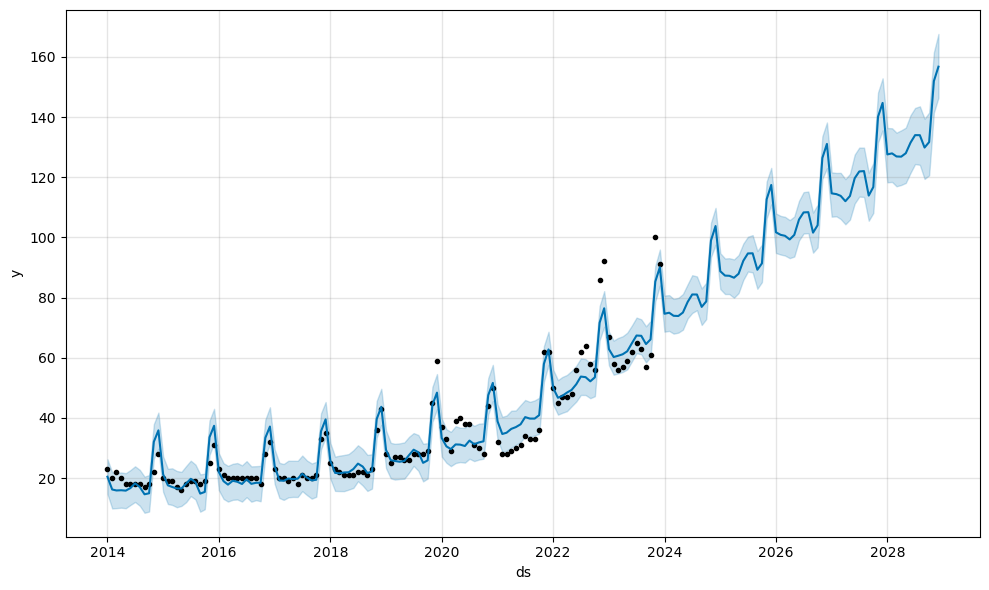

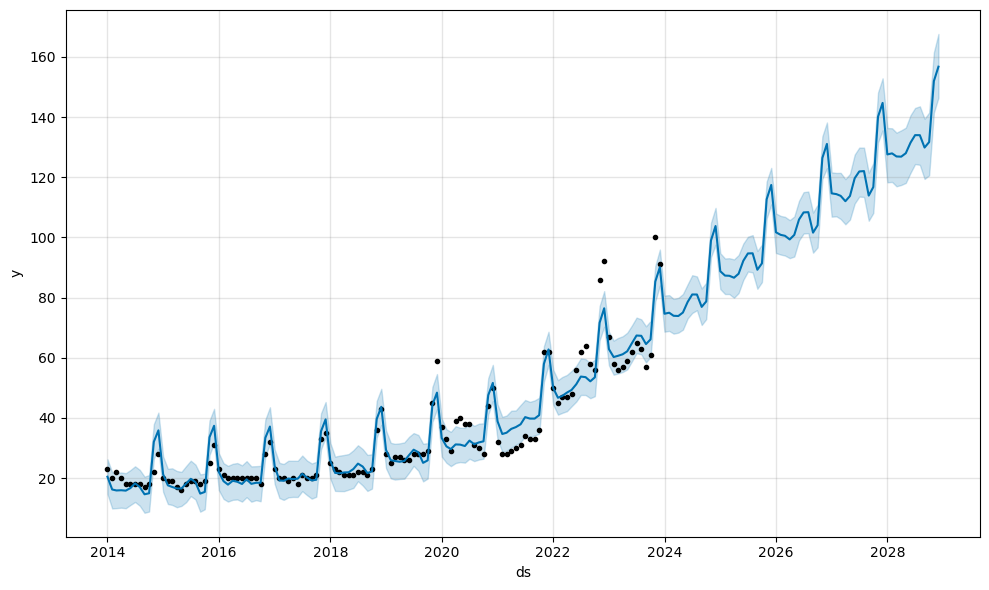

In [45]:
m.plot(forecast)

In [ ]:
tennis_skirt_df

Index(['Month', 'lululemon Sales'], dtype='object')

In [ ]:
lulu_lemon_df.dropna()

In [28]:
m.fit(lulu_lemon_df)

,ds,y
1,2014-01,23
2,2014-02,20
3,2014-03,22
4,2014-04,20
5,2014-05,18
...,...,...
116,2023-08,63
117,2023-09,57
118,2023-10,61
119,2023-11,100


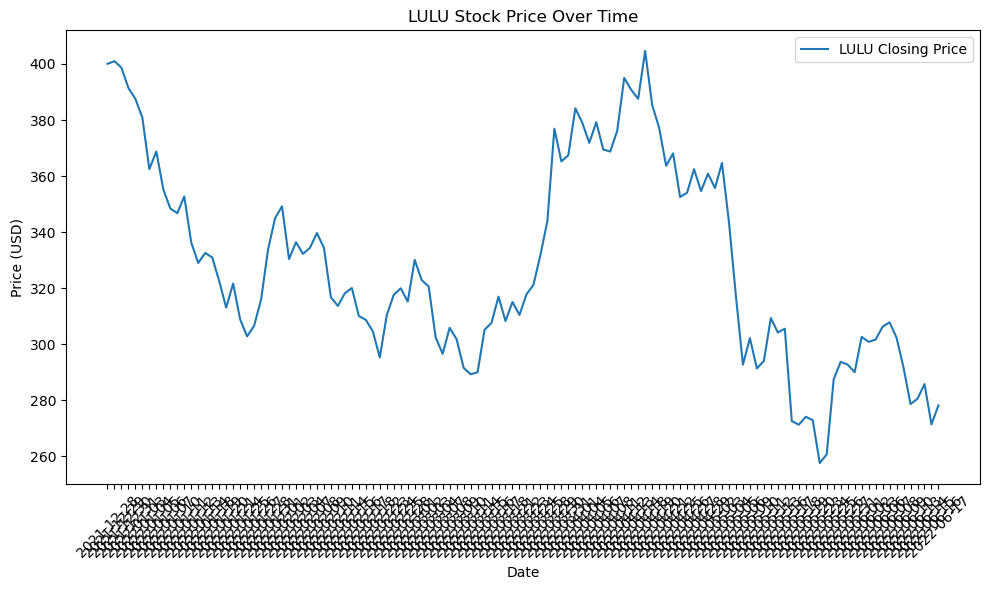

In [30]:
# STOCK DATA
ticker = "LULU"

api_url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/2014-01-01/2023-12-01?adjusted=true&sort=asc&limit=120&apiKey=s3nEpo1Ar6jYpz1NE1HF5xeff7HBikJK"
# URL and API key (Note: Using the provided API key)
url = api_url

# Performing the GET request
response = requests.get(url)
data = response.json()

# Extracting the necessary information
dates = [item["t"] for item in data["results"]]
closing_prices = [item["c"] for item in data["results"]]

# Converting timestamp to readable date format
from datetime import datetime
dates = [datetime.fromtimestamp(date/1000).strftime('%Y-%m-%d') for date in dates]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(dates, closing_prices, label=f"{ticker} Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title(f"{ticker} Stock Price Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [33]:

results = data['results']

# Creating a DataFrame
lulu_df = pd.DataFrame(results)

# Selecting only the timestamp ('t') and closing price ('c') columns
lulu_df = lulu_df[['t', 'c']]

# Converting timestamp to a readable format
lulu_df['t'] = pd.to_datetime(lulu_df['t'], unit='ms').dt.date

lulu_df = lulu_df.rename(columns={'t': 'ds', 'c': 'y'})
lulu_df.dropna()

lulu_df.head()  # Displaying the DataFrame

,ds,y
0,2021-12-28,400.07
1,2021-12-29,401.00
2,2021-12-30,398.69
3,2021-12-31,391.45
4,2022-01-03,387.56


In [34]:

m = Prophet()
m.fit(lulu_df)

19:33:36 - cmdstanpy - INFO - Chain [1] start processing
19:33:36 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
future = m.make_future_dataframe(periods=500, freq='D')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))


,ds
0,2021-12-28
1,2021-12-29
2,2021-12-30
3,2021-12-31
4,2022-01-03
5,2022-01-04
6,2022-01-05
7,2022-01-06
8,2022-01-07
9,2022-01-10


In [42]:
forecast = m.predict(future)
display(forecast.head(10))


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-28,367.439373,330.873867,394.165098,367.439373,367.439373,-5.498100,-5.498100,-5.498100,-5.498100,-5.498100,-5.498100,0.0,0.0,0.0,361.941273
1,2021-12-29,366.623534,329.648311,392.177534,366.623534,366.623534,-4.279652,-4.279652,-4.279652,-4.279652,-4.279652,-4.279652,0.0,0.0,0.0,362.343882
2,2021-12-30,365.807694,330.042880,389.261720,365.807694,365.807694,-5.622989,-5.622989,-5.622989,-5.622989,-5.622989,-5.622989,0.0,0.0,0.0,360.184705
3,2021-12-31,364.991855,319.647748,385.562932,364.991855,364.991855,-9.840563,-9.840563,-9.840563,-9.840563,-9.840563,-9.840563,0.0,0.0,0.0,355.151292
4,2022-01-03,362.544336,326.307137,389.096453,362.544336,362.544336,-6.515780,-6.515780,-6.515780,-6.515780,-6.515780,-6.515780,0.0,0.0,0.0,356.028557
5,2022-01-04,361.728497,325.259164,384.774930,361.728497,361.728497,-5.498100,-5.498100,-5.498100,-5.498100,-5.498100,-5.498100,0.0,0.0,0.0,356.230396
6,2022-01-05,360.912657,325.765832,388.361261,360.912657,360.912657,-4.279652,-4.279652,-4.279652,-4.279652,-4.279652,-4.279652,0.0,0.0,0.0,356.633005
7,2022-01-06,360.096818,323.706278,385.888431,360.096818,360.096818,-5.622989,-5.622989,-5.622989,-5.622989,-5.622989,-5.622989,0.0,0.0,0.0,354.473828
8,2022-01-07,359.280978,316.675310,380.586188,359.280978,359.280978,-9.840563,-9.840563,-9.840563,-9.840563,-9.840563,-9.840563,0.0,0.0,0.0,349.440415
9,2022-01-10,356.833459,318.151176,381.559833,356.833459,356.833459,-6.515780,-6.515780,-6.515780,-6.515780,-6.515780,-6.515780,0.0,0.0,0.0,350.317680


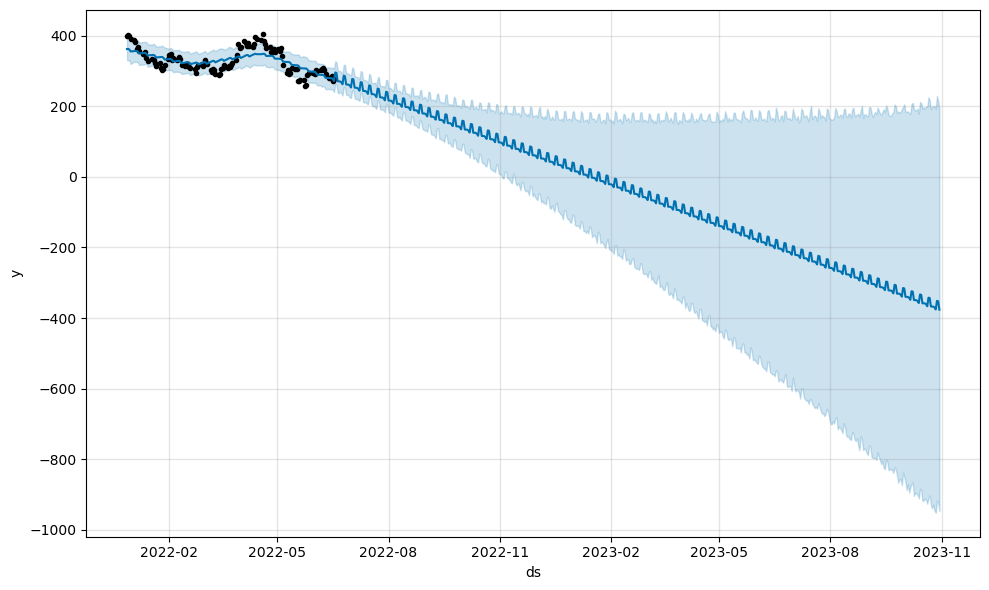

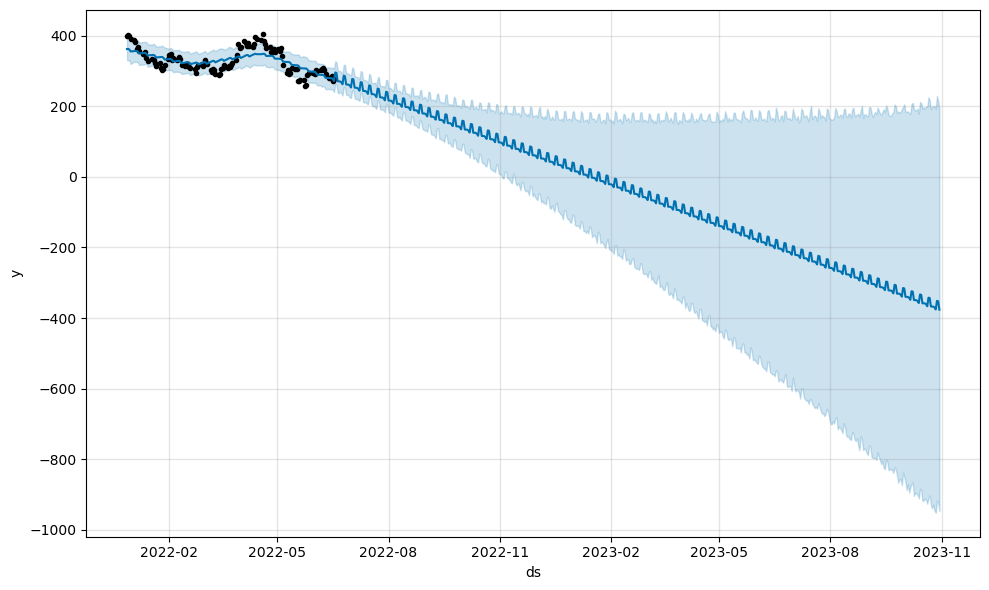

In [43]:
m.plot(forecast)

In [10]:
lulu_lemon_df

,Month,lululemon Sales
0,Month,lululemon: (United States)
1,2014-01,23
2,2014-02,20
3,2014-03,22
4,2014-04,20
...,...,...
116,2023-08,63
117,2023-09,57
118,2023-10,61
119,2023-11,100


In [13]:
#lulu_lemon_df = lulu_lemon_df.drop(0)
#

In [14]:
lulu_lemon_df

,Month,lululemon Sales
1,2014-01,23
2,2014-02,20
3,2014-03,22
4,2014-04,20
5,2014-05,18
...,...,...
116,2023-08,63
117,2023-09,57
118,2023-10,61
119,2023-11,100


,ds,y
1,2014-01,23
2,2014-02,20
3,2014-03,22
4,2014-04,20
5,2014-05,18
...,...,...
116,2023-08,63
117,2023-09,57
118,2023-10,61
119,2023-11,100
